In [35]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os

In [36]:
data_dir = os.path.join(os.getcwd(), "..", "data", "preprocessed")
df = pd.read_csv(os.path.join(data_dir, "preprocessed_data.csv"))

In [37]:
numeric_df = df.select_dtypes(include=['number'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)

In [38]:
pca = PCA()
components = pca.fit_transform(X_scaled)
evr = pca.explained_variance_ratio_
PCs = pca.fit_transform(X_scaled)

In [39]:
print("Explained Variance Ratio per Principal Component:")
for i, ratio in enumerate(evr, start=1):
    print(f"PC{i}: {ratio:.4f}")

Explained Variance Ratio per Principal Component:
PC1: 0.3090
PC2: 0.1104
PC3: 0.0987
PC4: 0.0681
PC5: 0.0670
PC6: 0.0662
PC7: 0.0655
PC8: 0.0581
PC9: 0.0495
PC10: 0.0385
PC11: 0.0317
PC12: 0.0270
PC13: 0.0104
PC14: 0.0001
PC15: 0.0000


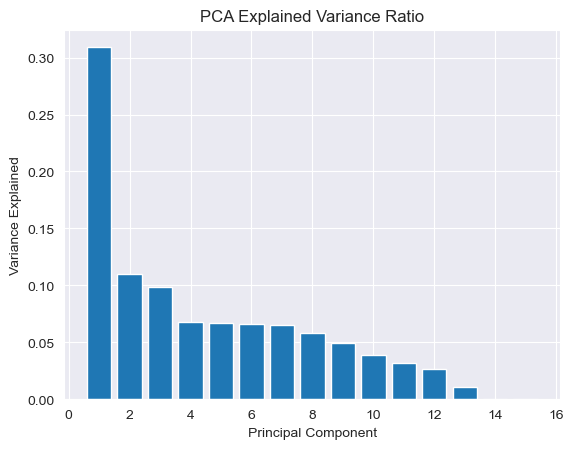

In [40]:
# Plot explained variance ratio
plt.figure()
plt.bar(range(1, len(evr) + 1), evr)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('PCA Explained Variance Ratio')
plt.show()

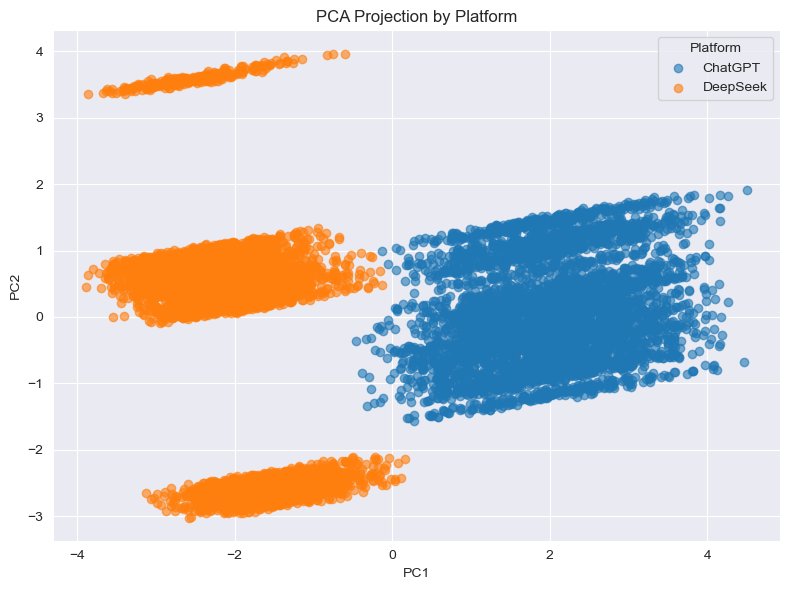

In [41]:
# Scatter plot of the first two principal components
plot_df = pd.DataFrame({
    'PC1': PCs[:, 0],
    'PC2': PCs[:, 1],
    'Platform': df['AI_Platform']
})

plt.figure(figsize=(8, 6))
for name, group in plot_df.groupby('Platform'):
    plt.scatter(group['PC1'], group['PC2'], alpha=0.6, label=name)

plt.xlabel(f'PC1')
plt.ylabel(f'PC2')
plt.title('PCA Projection by Platform')
plt.legend(title='Platform')
plt.grid(True)
plt.tight_layout()
plt.show()

In [42]:
# Compute feature loadings
loadings = pd.DataFrame(
    pca.components_.T,
    index=numeric_df.columns,
    columns=[f'PC{i}' for i in range(1, pca.n_components_ + 1)]
)

# Identify top contributors for PC1 and PC2
top_pc1 = loadings['PC1'].abs().sort_values(ascending=False).head(10)
top_pc2 = loadings['PC2'].abs().sort_values(ascending=False).head(10)

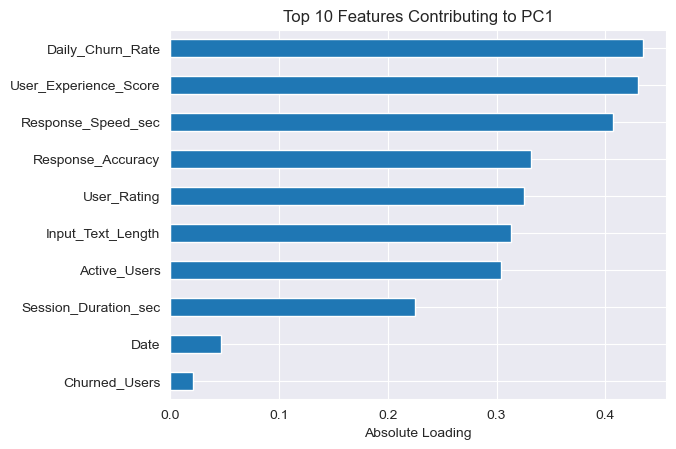

In [43]:
# Bar chart for PC1 contributors
plt.figure()
top_pc1.sort_values().plot(kind='barh')
plt.xlabel('Absolute Loading')
plt.title('Top 10 Features Contributing to PC1')
plt.show()

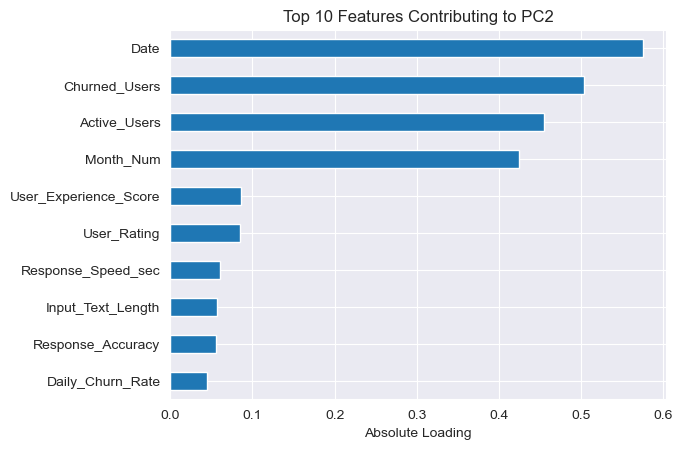

In [44]:
# Bar chart for PC2 contributors
plt.figure()
top_pc2.sort_values().plot(kind='barh')
plt.xlabel('Absolute Loading')
plt.title('Top 10 Features Contributing to PC2')
plt.show()